In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, metrics
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
from lightgbm import LGBMClassifier

%matplotlib inline

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
names =  ['wf_make','wf_address','wf_all','wf_3d','wf_our','wf_over','wf_remove','wf_internet','wf_order','wf_mail',
              'wf_receive','wf_will','wf_people','wf_report','wf_addresses','wf_free','wf_business','wf_email','wf_you',
              'wf_credit','wf_your','wf_font','wf_000','wf_money','wf_hp','wf_hpl','wf_george','wf_650','wf_lab','wf_labs',
             'wf_telnet','wf_857','wf_data','wf_415','wf_85','wf_technology','wf_1999','wf_parts','wf_pm','wf_direct',
              'wf_cs','wf_meeting','wf_original','wf_project','wf_re','wf_edu','wf_table','wf_conference','wf_;','wf_(',
             'wf_[','wf_!','wf_$','wf_#','wf','crl_average','crl_longest','crl_total']
df = pd.read_csv('/content/spambase.data', header=None, names=names)

In [10]:
df.head()

,wf_make,wf_address,wf_all,wf_3d,wf_our,wf_over,wf_remove,wf_internet,wf_order,wf_mail,...,wf_;,wf_(,wf_[,wf_!,wf_$,wf_#,wf,crl_average,crl_longest,crl_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [11]:
# Checking null and missing values
print("\nNull Values:\n", df.isnull().sum())
print("\nMissing Values:\n", df.isna().sum())
# No null or missing values


Null Values:
 wf_make          0
wf_address       0
wf_all           0
wf_3d            0
wf_our           0
wf_over          0
wf_remove        0
wf_internet      0
wf_order         0
wf_mail          0
wf_receive       0
wf_will          0
wf_people        0
wf_report        0
wf_addresses     0
wf_free          0
wf_business      0
wf_email         0
wf_you           0
wf_credit        0
wf_your          0
wf_font          0
wf_000           0
wf_money         0
wf_hp            0
wf_hpl           0
wf_george        0
wf_650           0
wf_lab           0
wf_labs          0
wf_telnet        0
wf_857           0
wf_data          0
wf_415           0
wf_85            0
wf_technology    0
wf_1999          0
wf_parts         0
wf_pm            0
wf_direct        0
wf_cs            0
wf_meeting       0
wf_original      0
wf_project       0
wf_re            0
wf_edu           0
wf_table         0
wf_conference    0
wf_;             0
wf_(             0
wf_[             0
wf_!            

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wf_make        4601 non-null   float64
 1   wf_address     4601 non-null   float64
 2   wf_all         4601 non-null   float64
 3   wf_3d          4601 non-null   float64
 4   wf_our         4601 non-null   float64
 5   wf_over        4601 non-null   float64
 6   wf_remove      4601 non-null   float64
 7   wf_internet    4601 non-null   float64
 8   wf_order       4601 non-null   float64
 9   wf_mail        4601 non-null   float64
 10  wf_receive     4601 non-null   float64
 11  wf_will        4601 non-null   float64
 12  wf_people      4601 non-null   float64
 13  wf_report      4601 non-null   float64
 14  wf_addresses   4601 non-null   float64
 15  wf_free        4601 non-null   float64
 16  wf_business    4601 non-null   float64
 17  wf_email       4601 non-null   float64
 18  wf_you  

Split Data

In [13]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Normalization

In [14]:
scaler = MinMaxScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

# Modeling

Nested CV

In [15]:
# Choose cross-validation techniques for the inner and outer loops, independently of the dataset
inner_cv = KFold(n_splits=4, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=4, shuffle=True, random_state=42)

In [16]:
# Set up possible values of parameters for each model to optimize
tree = DecisionTreeClassifier()
param_dict_tree = {'criterion':['gini','entropy'], 'max_depth':range(1,10), 
                   'min_samples_leaf':range(1,5), 'min_samples_split':range(1,10)} 

knn =  KNeighborsClassifier()
param_dict_knn = {'n_neighbors':list(range(1,31)), 'weights':['uniform', 'distance']}

log = LogisticRegression()
param_dict_log = {'C':[0.0001,0.001, 0.01, 1, 0.1, 10, 100, 1000], 'penalty':['l1','l2']}

svm = SVC()
param_dict_svm = {'C':[0.1,1,100], 'kernel':['rbf','linear','poly','sigmoid'], 'gamma':[1, 0.1, 0.01]}

lgb = LGBMClassifier()
param_dict_lgb = {'max_depth':[-1],'num_leaves':[22, 31],'learning_rate':[0.05,0.1,0.3]}

In [17]:
clf_tree = GridSearchCV(estimator=tree, param_grid=param_dict_tree, scoring = 'accuracy', cv=inner_cv)
clf_knn = GridSearchCV(estimator=knn, param_grid=param_dict_knn, scoring = 'accuracy', cv=inner_cv)
clf_log = GridSearchCV(estimator=log, param_grid=param_dict_log, scoring = 'accuracy', cv=inner_cv)
clf_svm = GridSearchCV(estimator=svm, param_grid=param_dict_svm, scoring = 'accuracy', cv=inner_cv)
clf_lgb = GridSearchCV(estimator=lgb, param_grid=param_dict_lgb, scoring = 'accuracy', cv=inner_cv)

score_tree = cross_val_score(clf_tree, X=X_train_n, y=y_train, cv=outer_cv)
score_knn = cross_val_score(clf_knn, X=X_train_n, y=y_train, cv=outer_cv)
score_log = cross_val_score(clf_log, X=X_train_n, y=y_train, cv=outer_cv)
score_svm = cross_val_score(clf_svm, X=X_train_n, y=y_train, cv=outer_cv)
score_lgb = cross_val_score(clf_lgb, X=X_train_n, y=y_train, cv=outer_cv)

In [18]:
score = {}

score['tree'] = score_tree.mean()
score['knn'] = score_knn.mean()
score['logistic'] = score_log.mean()
score['svm'] = score_svm.mean()
score['lgb'] = score_lgb.mean()
score

{'knn': 0.8991017737126686,
 'lgb': 0.9474413394646858,
 'logistic': 0.9198641501170683,
 'svm': 0.9237564640288376,
 'tree': 0.9097941617396871}

Result: we can see outcomes from nested CV that LightGBM performs best, hence we'll use LightGBM to proceed

# LightGBM

In [19]:
param_dict_lgb = {'max_depth':[-1],'num_leaves':[22, 31],'learning_rate':[0.05,0.1,0.3]}
lgb = LGBMClassifier()

# Create grid search using 5-fold cross validation
grid_lgb = GridSearchCV(lgb, param_dict_lgb, cv=5, verbose=0)

# Fit grid search
best_model = grid_lgb.fit(X_train_n, y_train)

# View best hyperparameters
grid_lgb.best_params_

{'learning_rate': 0.1, 'max_depth': -1, 'num_leaves': 31}

In [20]:
# Build confusion matrix and calculate other indicators
grid_predictions = grid_lgb.predict(X_test_n)
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

[[859  27]
 [ 36 597]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       886
           1       0.96      0.94      0.95       633

    accuracy                           0.96      1519
   macro avg       0.96      0.96      0.96      1519
weighted avg       0.96      0.96      0.96      1519



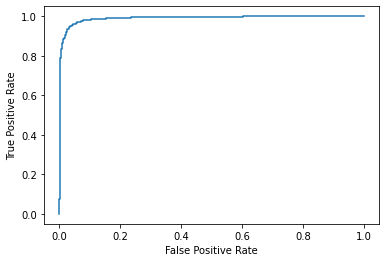

In [21]:
#define metrics
y_pred_proba = grid_lgb.predict_proba(X_test_n)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Based on the ROC curve, you can see that the LightGBM model is very good at identifying spam emails, however, we didn't consider the cost of misclassification. Next, we'll try to use 10:1 cost ratio for different misclassification errors. 270+36 / 1519

# Building cost-sensitive prediction models

In [22]:
def cost_func(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    cost = matrix[0][1] * 10 + matrix[1][0] * 1
    return cost

In [23]:
scoring = make_scorer(cost_func, greater_is_better= False)
cost_score = {'tree':{},'logistic':{},'knn':{},'svm':{}, 'lgb':{}}

Nested CV

In [24]:
# Choose cross-validation techniques for the inner and outer loops, independently of the dataset
inner_cv = KFold(n_splits=4, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=4, shuffle=True, random_state=42)

In [25]:
# Set up possible values of parameters for each model to optimize
tree = DecisionTreeClassifier()
param_dict_tree = {'criterion':['gini','entropy'], 'max_depth':range(1,10), 
                   'min_samples_leaf':range(1,5), 'min_samples_split':range(1,10)} 

knn =  KNeighborsClassifier()
param_dict_knn = {'n_neighbors':list(range(1,31)), 'weights':['uniform', 'distance']}

log = LogisticRegression()
param_dict_log = {'C':[0.0001,0.001, 0.01, 1, 0.1, 10, 100, 1000], 'penalty':['l1','l2']}

svm = SVC()
param_dict_svm = {'C':[0.1,1,100], 'kernel':['rbf','linear','poly','sigmoid'], 'gamma':[1, 0.1, 0.01]}

lgb = LGBMClassifier()
param_dict_lgb = {'max_depth':[-1],'num_leaves':[22, 31],'learning_rate':[0.05,0.1,0.3]}

In [26]:
clf_tree = GridSearchCV(estimator=tree, param_grid=param_dict_tree, scoring = scoring, cv=inner_cv)
clf_knn = GridSearchCV(estimator=knn, param_grid=param_dict_knn, scoring = scoring, cv=inner_cv)
clf_log = GridSearchCV(estimator=log, param_grid=param_dict_log, scoring = scoring, cv=inner_cv)
clf_svm = GridSearchCV(estimator=svm, param_grid=param_dict_svm, scoring = scoring, cv=inner_cv)
clf_lgb = GridSearchCV(estimator=lgb, param_grid=param_dict_lgb, scoring = scoring, cv=inner_cv)

score_tree = cross_val_score(clf_tree, X=X_train_n, y=y_train, cv=outer_cv)
score_knn = cross_val_score(clf_knn, X=X_train_n, y=y_train, cv=outer_cv)
score_log = cross_val_score(clf_log, X=X_train_n, y=y_train, cv=outer_cv)
score_svm = cross_val_score(clf_svm, X=X_train_n, y=y_train, cv=outer_cv)
score_lgb = cross_val_score(clf_lgb, X=X_train_n, y=y_train, cv=outer_cv)

In [27]:
score = {}

score['tree'] = score_tree.mean()
score['knn'] = score_knn.mean()
score['logistic'] = score_log.mean()
score['svm'] = score_svm.mean()
score['lgb'] = score_lgb.mean()
score

{'knn': -307.0,
 'lgb': -208.5,
 'logistic': -279.75,
 'svm': -240.25,
 'tree': -266.0}

Result: we can see outcomes from nested CV that when we consider the class wights, LightGBM would get the lowest cost . Hence we'll use LightGBM to proceed

# LightGBM

In [28]:
param_dict_lgb = {'max_depth':[-1],'num_leaves':[22, 31],'learning_rate':[0.05,0.1,0.3]}
lgb = LGBMClassifier()

# Create grid search using 5-fold cross validation
grid_lgb = GridSearchCV(lgb, param_dict_lgb, cv=5, verbose=0, scoring = scoring)

# Fit grid search
best_model = grid_lgb.fit(X_train_n, y_train)

# View best hyperparameters
grid_lgb.best_params_

{'learning_rate': 0.3, 'max_depth': -1, 'num_leaves': 31}

In [29]:
# Build confusion matrix and calculate other indicators
grid_predictions = grid_lgb.predict(X_test_n)
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

[[852  34]
 [ 30 603]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       886
           1       0.95      0.95      0.95       633

    accuracy                           0.96      1519
   macro avg       0.96      0.96      0.96      1519
weighted avg       0.96      0.96      0.96      1519



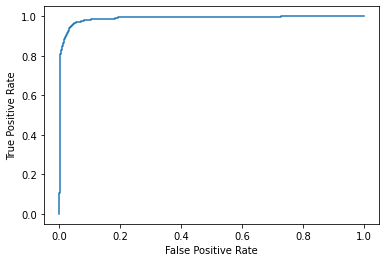

In [30]:
#define metrics
y_pred_proba = grid_lgb.predict_proba(X_test_n)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

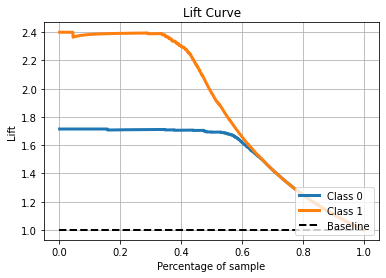

In [31]:
!pip install scikit-plot
import scikitplot as skplt
y_score_log = grid_lgb.predict_proba(X_test_n)

# Lift Curve
skplt.metrics.plot_lift_curve(y_test, y_score_log)
plt.show()

Conclusion: LightGBM got a 0.95 recall and 0.96 accuracy which show the great performance of this model. ROC curve can also support this finding, that is to say, the more the curve hugs the top left corner of the plot, the better the model does at classifying the data into categories. Finally, we use lift curve as visual aid for measuring model performance. And it shows a great area between the curve and baseline, which means the model is well-performed.¶